In [2]:
# Import Intel Acceleration library to Patch the Scikit learn packages
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from bs4 import UnicodeDammit
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import numpy as np
from matplotlib import cm
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

warnings.filterwarnings('ignore')

### Đọc dữ liệu vào chung một dataframe, và tiền xữ lý dữ liệu

In [94]:
fake_data = pd.read_csv("Data/Fake.csv")
true_data = pd.read_csv("Data/True.csv")

In [95]:
fake_data.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [96]:
fake_data.shape

(23481, 4)

In [97]:
true_data.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [99]:
true_data['text'].head(20)

0     WASHINGTON (Reuters) - The head of a conservat...
1     WASHINGTON (Reuters) - Transgender people will...
2     WASHINGTON (Reuters) - The special counsel inv...
3     WASHINGTON (Reuters) - Trump campaign adviser ...
4     SEATTLE/WASHINGTON (Reuters) - President Donal...
5     WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...
6     WEST PALM BEACH, Fla (Reuters) - President Don...
7     The following statements were posted to the ve...
8     The following statements were posted to the ve...
9     WASHINGTON (Reuters) - Alabama Secretary of St...
10    (Reuters) - Alabama officials on Thursday cert...
11    NEW YORK/WASHINGTON (Reuters) - The new U.S. t...
12    The following statements were posted to the ve...
13    The following statements were posted to the ve...
14     (In Dec. 25 story, in second paragraph, corre...
15    (Reuters) - A lottery drawing to settle a tied...
16    WASHINGTON (Reuters) - A Georgian-American bus...
17    The following statements were posted to th

In [101]:
true_data['text'][0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [102]:
true_data['text'][7]

'The following statements\xa0were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.\xa0Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - While the Fake News loves to talk about my so-called low approval rating, @foxandfriends just showed that my rating on Dec. 28, 2017, was approximately the same as President Obama on Dec. 28, 2009, which was 47%...and this despite massive negative Trump coverage & Russia hoax! [0746 EST] - Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE! [0804 EST] -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR) '

In [103]:
true_data2=true_data.copy()
true_data2[['source', 'new_text']] = true_data2['text'].str.split(' - ', 1, expand=True)

In [104]:
source_list = true_data2.source.unique().tolist()
source_df = pd.DataFrame(source_list)

In [105]:
source_df

,0
0,WASHINGTON (Reuters)
1,SEATTLE/WASHINGTON (Reuters)
2,"WEST PALM BEACH, Fla./WASHINGTON (Reuters)"
3,"WEST PALM BEACH, Fla (Reuters)"
4,The following statements were posted to the ve...
...,...
1719,(Story corrects to fix spelling in paragraph ...
1720,"MELILLA, Spain (Reuters)"
1721,"AL UDEID AIR BASE, Qatar (Reuters)"
1722,"PENEDO, Brazil (Reuters)"


In [106]:
source_list

['WASHINGTON (Reuters)',
 'SEATTLE/WASHINGTON (Reuters)',
 'WEST PALM BEACH, Fla./WASHINGTON (Reuters)',
 'WEST PALM BEACH, Fla (Reuters)',
 'The following statements\xa0were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.\xa0Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump :',
 '(Reuters)',
 'NEW YORK/WASHINGTON (Reuters)',
 ' (In Dec. 25 story, in second paragraph, corrects name of Strong’s employer to Mental Health Department, not Public Health Department.) By Bernie Woodall (Reuters)',
 'NEW YORK (Reuters)',
 'LIMA (Reuters)',
 'MEXICO CITY (Reuters)',
 'VATICAN CITY (Reuters)',
 ' KING OF PRUSSIA, Pennsylvania/WASHINGTON (Reuters)',
 'SAN FRANCISCO (Reuters)',
 'BOSTON (Reuters)',
 'ATLANTA (Reuters)',
 ' (Corrects spelling of Virginia House of Delegates member David Yancey throughout in this Dec. 19 story.) By Sharon Bernstein (Reuters)',
 'WASHINGTON ()',

In [108]:
source_df = source_df[~source_df[0].str.endswith('(Reuters)')]
source_df = source_df[~source_df[0].str.endswith('@realDonaldTrump :')]
source_df = source_df[~source_df[0].str.contains('@realDonaldTrump :')]
print(source_df.shape)
source_df

(57, 1)


,0
17,WASHINGTON ()
31,WASHINGTON (Reuters on Friday )
35,NEW YORK (LPC/IFR)
50,WASHINGTON
104,NEW YORK (IFR)
273,The White House on Wednesday disclosed a group...
311,SYDNEY/WASHINGTON (Reuters))
341,"Neil Gorsuch, President Donald Trump’s appoint..."
348,WASHINGTON The clock began running out this we...
398,ABU DHABI


Phần lớn những mẫu tin thật bắt đầu:  
- ...(Reuters) 
- ...@realDonaldTrump : 

==> Xóa bỏ

In [88]:
def remove_text_until_string(input_string, string):
    index = input_string.find(string)
    if index != -1:
        return input_string[index + len(string):]
    else:
        return input_string

In [109]:
true_data['text'] = true_data['text'].apply(lambda x: remove_text_until_string(x, '(Reuters) '))
true_data['text'] = true_data['text'].apply(lambda x: remove_text_until_string(x, '@realDonaldTrump : '))

In [110]:
true_data['text'].head(20)

0     - The head of a conservative Republican factio...
1     - Transgender people will be allowed for the f...
2     - The special counsel investigation of links b...
3     - Trump campaign adviser George Papadopoulos t...
4     - President Donald Trump called on the U.S. Po...
5     - The White House said on Friday it was set to...
6     - President Donald Trump said on Thursday he b...
7     - While the Fake News loves to talk about my s...
8     - Together, we are MAKING AMERICA GREAT AGAIN!...
9     - Alabama Secretary of State John Merrill said...
10    - Alabama officials on Thursday certified Demo...
11    - The new U.S. tax code targets high-tax state...
12    - Vanity Fair, which looks like it is on its l...
13    - “On 1/20 - the day Trump was inaugurated - a...
14    - A man claiming to be the person who delivere...
15    - A lottery drawing to settle a tied Virginia ...
16    - A Georgian-American businessman who met then...
17    - Based on the fact that the very unfair a

In [112]:
# gắn nhãn cho tin
fake_data['label'] = 0  # Gán nhãn 0 cho tin giả
true_data['label'] = 1  # Gán nhãn 1 cho tin thật

In [117]:
data = pd.concat([fake_data, true_data], ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)
data.shape

(44898, 5)

In [118]:
data['content'] = data['title'] + ' ' + data['text']

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
 5   content  44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [120]:
data = data.drop(['title', 'text', 'subject', 'date'], axis = 1)

In [121]:
# Check null
data.isnull().sum()

label      0
content    0
dtype: int64

In [123]:
# Check duplicated
data.duplicated().sum()

5794

In [124]:
# Drop duplicated and check again
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [125]:
data.reset_index(drop=True)

,label,content
0,0,WATCH BLOCKBUSTER REPORT: Unmasking of Trump C...
1,0,Obama Teasing Stephen Curry For ‘Clowning’ Ju...
2,0,WATCH SHOCKING DISPLAY of Muslim Intimidation ...
3,0,Trump’s Top Adviser Just Fantasized About Wat...
4,0,Trump Congratulates Himself For His Own Press...
...,...,...
39099,1,U.S. businesses fear NAFTA doomed; Mexico warn...
39100,1,Chief justice calls U.S. patent challenge proc...
39101,1,Suu Kyi silence on Myanmar ethnic cleansing ch...
39102,1,Hillary Clinton willing to add more presidenti...


In [126]:
# See some samples
data.sample(10)

,label,content
18338,1,Virtual tie raises doubts: Can Hillary Clinton...
17329,0,WATCH YOUNG TEENAGE THUGS AS THEY ROB FEMALE R...
43420,0,Trump Tries Taking Credit For Jobs Created By...
29186,1,Resignation letter of Zimbabwe's Mugabe doesn'...
42584,1,Attorney General Lynch seeks funds for expande...
13400,0,The Reason This Latino Democrat Is Voting For...
22059,0,THOMAS SOWELL’S FINAL COLUMN: “…too many of ou...
615,1,Macedonia's largest opposition party appoints ...
2261,0,Ron Paul Highlights Real List of Mainstream ‘F...
28219,1,Reaction to death of U.S. Justice Scalia - Con...


### Clean the data

In [127]:
import nltk

In [128]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [129]:
# Dump the data to disk before preprocessing
data.to_csv('Data/news_before_preprocessed.csv', index=False)

In [132]:
# Define a function to clean the text, combining all steps together
def simple_text_clean(dataframe):
    from nltk.corpus import stopwords, wordnet
    from nltk.stem import WordNetLemmatizer
    from nltk import pos_tag, word_tokenize

    stop_words = set(stopwords.words('english'))

    # Remove HTTP links
    dataframe['content'] = dataframe['content'].replace(
        r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '',
        regex=True)

    # Remove end of line characters
    dataframe['content'] = dataframe['content'].replace(r'[\r\n]+', ' ', regex=True)

    # Remove numbers, only keep letters
    dataframe['content'] = dataframe['content'].replace('[\w]*\d+[\w]*', '', regex=True)

    # Remove punctuation
    dataframe['content'] = dataframe['content'].replace('[^\w\s]', ' ', regex=True)
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for char in punctuation:
        dataframe['content'] = dataframe['content'].replace(char, ' ')

    # Remove multiple spaces with one space
    dataframe['content'] = dataframe['content'].replace('[\s]{2,}', ' ', regex=True)

    # Some lines start with a space, remove them
    dataframe['content'] = dataframe['content'].replace('^[\s]{1,}', '', regex=True)

    # Some lines end with a space, remove them
    dataframe['content'] = dataframe['content'].replace('[\s]{1,}$', '', regex=True)

    # Convert to lower case
    dataframe['content'] = dataframe['content'].str.lower()

    # Remove rows that are empty
    dataframe = dataframe[dataframe['content'].str.len() > 0]

    # Remove stop words
    def remove_stopwords(text):
        text_split = text.split()
        text = [word for word in text_split if word not in stop_words]
        return ' '.join(text)

    dataframe['content'] = dataframe['content'].apply(remove_stopwords)

    # Word Net Lemmatizer instead of Stemming, to have a better result
    lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(treebank_tag):
        """
        return WORDNET POS compliance to WORDENT lemmatization (a,n,r,v)
        """
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            # As default pos in lemmatization is Noun
            return wordnet.NOUN

    def lemmatize_text(text):
        lemmatized = []
        post_tag_list = pos_tag(word_tokenize(text))
        for word, post_tag_val in post_tag_list:
            lemmatized.append(lemmatizer.lemmatize(word, get_wordnet_pos(post_tag_val)))
        text = ' '.join(x for x in lemmatized)
        return text
    
    dataframe['content'] = dataframe['content'].apply(lemmatize_text)

    return dataframe


In [133]:
# Clean the text
df = simple_text_clean(data)

In [5]:
# Dump the data to disk after preprocessing
df.to_csv('Data/news_after_preprocessed.csv', index=False)

NameError: name 'df' is not defined

In [6]:
# df = pd.read_csv('Data/news_after_preprocessed.csv')

In [7]:
df

,label,content
0,0,watch blockbuster report unmask trump contact ...
1,0,obama tease stephen curry clown proof coolest ...
2,0,watch shock display muslim intimidation front ...
3,0,trump top adviser fantasize waterboarding hill...
4,0,trump congratulate press conference twitter sh...
...,...,...
39094,1,u business fear nafta doom mexico warns conseq...
39095,1,chief justice call u patent challenge process ...
39096,1,suu kyi silence myanmar ethnic cleanse charge ...
39097,1,hillary clinton willing add presidential debat...


### TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [12]:
text_data = df['content']

In [13]:
# Fit the tfidf vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

In [14]:
# Create a new dataframe with tfidf features
df_tfidf = pd.DataFrame(tfidf_vectorizer.transform(text_data).toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [15]:
# Show some random samples
df_tfidf.sample(10)

,abadi,abandon,abbas,abbott,abc,abdullah,abe,abedin,abide,ability,...,zarrab,zealand,zero,zika,zimbabwe,zinke,zone,zor,zuckerberg,zuma
7076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


giả định rằng mỗi một nhóm tin tức sẽ có một xác suất tin giả khác nhau, ta sử dụng Kmeans để phân dữ liệu thành 2 cluster

In [16]:
from sklearn.cluster import KMeans

In [17]:
# Create a KMeans instance with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')

In [18]:
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

In [19]:
df.head()

,label,content,cluster
0,0,watch blockbuster report unmask trump contact ...,1
1,0,obama tease stephen curry clown proof coolest ...,0
2,0,watch shock display muslim intimidation front ...,1
3,0,trump top adviser fantasize waterboarding hill...,1
4,0,trump congratulate press conference twitter sh...,1


Áp dụng thuật toán classification (Naive Bayes) cho từng cụm

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
# Bước 3: Áp dụng thuật toán classification (Naive Bayes) cho từng cụm
cluster0_data = df[df['cluster'] == 0]
cluster1_data = df[df['cluster'] == 1]

In [49]:
cluster0_data.head()

,label,content,cluster
1,0,obama tease stephen curry clown proof coolest ...,0
5,1,ally press catalan leader declare full indepen...,0
6,1,saudi finance ministry say crackdown preserve ...,0
7,1,botswana court order government recognize tran...,0
9,1,democrat senate call franken resign u senator ...,0


In [50]:
cluster1_data.head()

,label,content,cluster
0,0,watch blockbuster report unmask trump contact ...,1
2,0,watch shock display muslim intimidation front ...,1
3,0,trump top adviser fantasize waterboarding hill...,1
4,0,trump congratulate press conference twitter sh...,1
8,0,ben carson get humiliate trump campaign demoti...,1


In [22]:
model_cluster0 = MultinomialNB()
model_cluster1 = MultinomialNB()

In [23]:
model_cluster0.fit(tfidf_matrix[cluster0_data.index], cluster0_data['label'])
model_cluster1.fit(tfidf_matrix[cluster1_data.index], cluster1_data['label'])

MultinomialNB()

In [57]:
# Dự đoán lớp:
cluster0_predictions = model_cluster0.predict(tfidf_matrix[cluster0_data.index])
cluster1_predictions = model_cluster1.predict(tfidf_matrix[cluster1_data.index])

In [58]:
# Gán kết quả dự đoán vào DataFrame
cluster0_data['predicted_label'] = cluster0_predictions
cluster1_data['predicted_label'] = cluster1_predictions

In [59]:
cluster0_data.head()

,label,content,cluster,probability_fake,predicted_label
1,0,obama tease stephen curry clown proof coolest ...,0,0.001371,0
5,1,ally press catalan leader declare full indepen...,0,0.999963,1
6,1,saudi finance ministry say crackdown preserve ...,0,0.995003,1
7,1,botswana court order government recognize tran...,0,0.231725,0
9,1,democrat senate call franken resign u senator ...,0,0.716190,1


In [60]:
cluster1_data.head()

,label,content,cluster,probability_fake,predicted_label
0,0,watch blockbuster report unmask trump contact ...,1,0.173526,0
2,0,watch shock display muslim intimidation front ...,1,0.015794,0
3,0,trump top adviser fantasize waterboarding hill...,1,0.031339,0
4,0,trump congratulate press conference twitter sh...,1,0.001461,0
8,0,ben carson get humiliate trump campaign demoti...,1,0.019378,0


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
y_pred = []
for i, row in df.iterrows():
    if row['cluster'] == 0:
        y_pred.append(model_cluster0.predict(tfidf_matrix[i])[0])
    else:
        y_pred.append(model_cluster1.predict(tfidf_matrix[i])[0])

In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy is", accuracy_score(df['label'], y_pred)*100,"%")

Accuracy is 93.88475408578223 %


Nhận xét: có Accuracy cao

In [ ]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion = confusion_matrix(df['label'], y_pred)
confusion

array([[16763,  1140],
       [ 1251, 19945]], dtype=int64)

In [32]:
# Danh giá	model
from sklearn. metrics import classification_report, roc_auc_score, roc_curve 

In [33]:
print(classification_report(df['label'], y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     17903
           1       0.95      0.94      0.94     21196

    accuracy                           0.94     39099
   macro avg       0.94      0.94      0.94     39099
weighted avg       0.94      0.94      0.94     39099



Nhận xét: có precision cao, recall cao

In [35]:
# Tính y_prob
y_prob = []
for i, row in df.iterrows():
    if row['cluster'] == 0:
        y_prob.append(model_cluster0.predict_proba(tfidf_matrix[i])[0][1])
    else:
        y_prob.append(model_cluster1.predict_proba(tfidf_matrix[i])[0][1])

In [52]:
# Tính xác suất tin giả cho cụm 0 và cụm 1
prob_fake_cluster0 = model_cluster0.predict_proba(tfidf_matrix[cluster0_data.index])[:, 1]
prob_fake_cluster1 = model_cluster1.predict_proba(tfidf_matrix[cluster1_data.index])[:, 1]
print('Xác suất tin giả cho cụm 0', prob_fake_cluster0)
print('Xác suất tin giả cho cụm 1', prob_fake_cluster1)

Xác suất tin giả cho cụm 0 [0.00137131 0.99996337 0.99500342 ... 0.76891747 0.99994662 0.99876865]
Xác suất tin giả cho cụm 1 [0.17352557 0.01579354 0.03133895 ... 0.45072154 0.00740483 0.92390728]


In [53]:
# Gán xác suất tin giả vào DataFrame cho cụm 0
cluster0_data['probability_fake'] = prob_fake_cluster0

# Gán xác suất tin giả vào DataFrame cho cụm 1
cluster1_data['probability_fake'] = prob_fake_cluster1

In [55]:
cluster0_data.head()

,label,content,cluster,probability_fake
1,0,obama tease stephen curry clown proof coolest ...,0,0.001371
5,1,ally press catalan leader declare full indepen...,0,0.999963
6,1,saudi finance ministry say crackdown preserve ...,0,0.995003
7,1,botswana court order government recognize tran...,0,0.231725
9,1,democrat senate call franken resign u senator ...,0,0.716190


In [56]:
cluster1_data.head()

,label,content,cluster,probability_fake
0,0,watch blockbuster report unmask trump contact ...,1,0.173526
2,0,watch shock display muslim intimidation front ...,1,0.015794
3,0,trump top adviser fantasize waterboarding hill...,1,0.031339
4,0,trump congratulate press conference twitter sh...,1,0.001461
8,0,ben carson get humiliate trump campaign demoti...,1,0.019378


In [36]:
# Tính roc_auc_score
roc_auc = roc_auc_score(df['label'], y_prob)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.9833683217745179


In [37]:
import matplotlib.pyplot as plt 

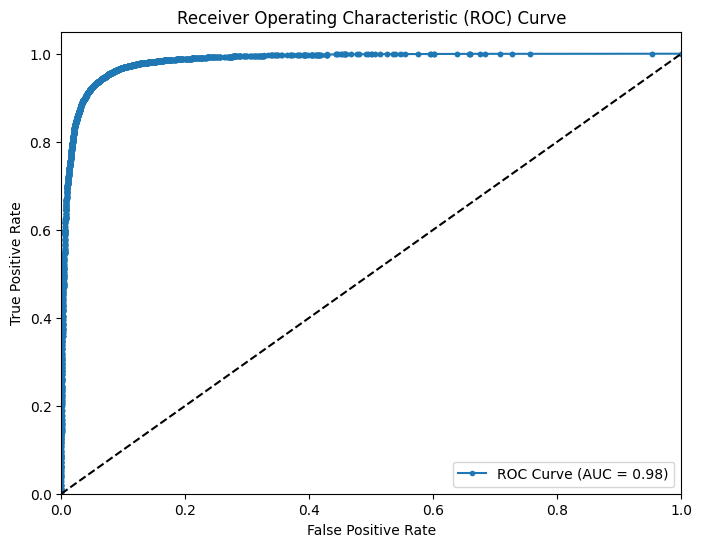

In [39]:
# Vẽ ROC Curve
fpr, tpr, _ = roc_curve(df['label'], y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc), marker='.')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Nhận xétL
- ROC cao
- Dựa trên tất cả các đánh giá  => model phù hợp 

In [45]:
# Định nghĩa hàm để lấy các từ khóa cho mỗi cụm
def get_cluster_keywords(cluster_data, num_keywords=10):
    # Tạo một vectorizer TF-IDF với giới hạn số từ khóa
    tfidf_vectorizer = TfidfVectorizer(max_features=num_keywords)
    
    # Tính ma trận TF-IDF cho dữ liệu trong cụm
    tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_data['content'])
    
    # Lấy danh sách các từ khóa dựa trên trọng số TF-IDF cao nhất
    keywords = tfidf_vectorizer.get_feature_names_out()
    
    return keywords

#### 3. Nhận xét trên từng cụm: mỗi cụm có những keywords nào? Vẽ WordClouds cho từng cụm.

In [47]:
# Lấy các từ khóa cho từng cụm
cluster0_keywords = get_cluster_keywords(cluster0_data)
cluster1_keywords = get_cluster_keywords(cluster1_data)

In [48]:
print("Các từ khóa của Cluster 0:", cluster0_keywords)
print("Các từ khóa của Cluster 1:", cluster1_keywords)

Các từ khóa của Cluster 0: ['government' 'make' 'one' 'people' 'president' 'say' 'state' 'trump'
 'would' 'year']
Các từ khóa của Cluster 1: ['campaign' 'clinton' 'donald' 'make' 'president' 'republican' 'say'
 'state' 'trump' 'would']


In [40]:
from wordcloud import WordCloud

In [41]:
# Bước 5: Nhận xét trên từng cụm và vẽ WordClouds
def plot_wordcloud(cluster_data, title):
    text = ' '.join(cluster_data['content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()



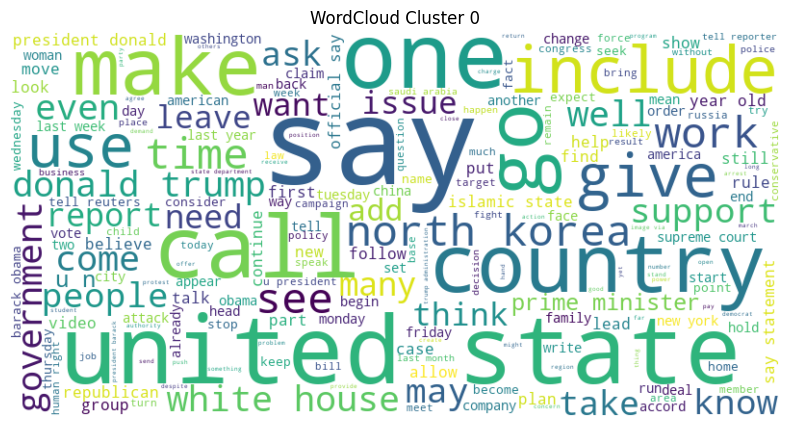

In [42]:
plot_wordcloud(cluster0_data, "WordCloud Cluster 0")


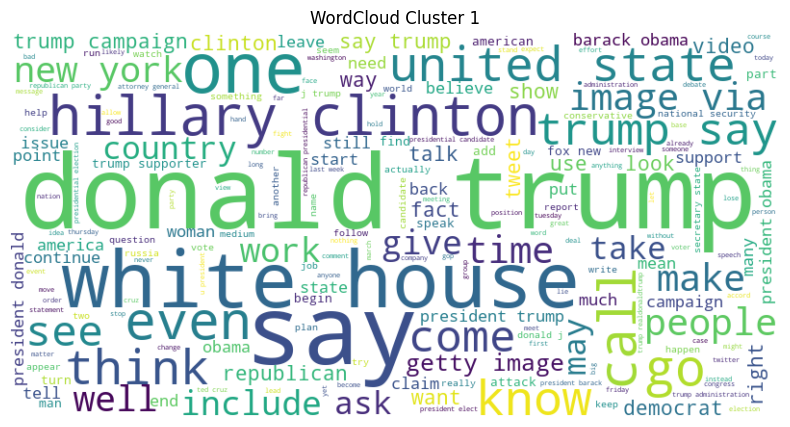

In [43]:
plot_wordcloud(cluster1_data, "WordCloud Cluster 1")